In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
import zipfile

#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
    
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

In [4]:
%ls pizza_steak

 Volume in drive C is Windows
 Volume Serial Number is 30AE-51B1

 Directory of C:\Users\SURIYA\Documents\Tensorflow Developer\tensorflow-deep-learning-main\tensorflow-deep-learning-main\pizza_steak

06-01-2023  09:11    <DIR>          .
06-01-2023  22:29    <DIR>          ..
06-01-2023  09:11    <DIR>          test
06-01-2023  09:11    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  280,478,568,448 bytes free


In [5]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 30AE-51B1

 Directory of C:\Users\SURIYA\Documents\Tensorflow Developer\tensorflow-deep-learning-main\tensorflow-deep-learning-main

06-01-2023  22:29    <DIR>          .
03-01-2023  08:30    <DIR>          ..
03-01-2023  08:30    <DIR>          .github
03-01-2023  08:30                68 .gitignore
06-01-2023  08:59    <DIR>          .ipynb_checkpoints
03-01-2023  09:09           118,655 00_tensorflow_fundamentals.ipynb
04-01-2023  14:32           296,729 01_neural_network_regression_in_tensorflow.ipynb
05-01-2023  09:13         1,185,730 02_neural_network_classification_in_tensorflow.ipynb
06-01-2023  08:59         2,802,661 03_convolutional_neural_networks_in_tensorflow.ipynb
03-01-2023  08:30           141,091 04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb
03-01-2023  08:30           728,181 05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb
03-01-2023  08:30         4,473,072 06_transfer_learning_i

In [6]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))

In [8]:
num_steak_images_train

750

In [9]:
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza/"))

In [10]:
num_pizza_images_train

750

In [11]:
num_steak_images_test = len(os.listdir("pizza_steak/test/steak/"))

In [12]:
num_steak_images_test

250

In [13]:
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza/"))

In [14]:
num_pizza_images_test

250

In [15]:
import pathlib
data_dir = pathlib.Path("pizza_steak/train/")

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [16]:
import random 
import matplotlib.image as mimg

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)
    
    print(f"Image shape is : {img.shape}")

Image shape is : (512, 512, 3)


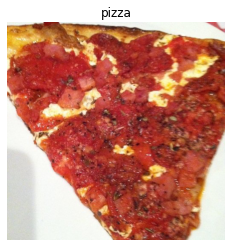

In [17]:
random_image = view_random_image( target_dir="pizza_steak/test/",
                 target_class="pizza")

In [18]:
random_image

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir, seed=42, 
                                               batch_size = 32, target_size=(224,224), class_mode='binary')

valid_data = test_datagen.flow_from_directory(test_dir, seed=42, batch_size=32, target_size=(224,224), 
                                              class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
model_1  = Sequential()

model_1.add(Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224, 3)))
model_1.add(Conv2D(10, 3, activation='relu'))
model_1.add(MaxPool2D(pool_size=2, padding='valid'))
model_1.add(Conv2D(10, 3, activation='relu'))
model_1.add(Conv2D(10, 3, activation='relu'))
model_1.add(MaxPool2D(pool_size=2))
model_1.add(Flatten())

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss=BinaryCrossentropy(), metrics='accuracy', optimizer='adam')

In [22]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 44s 914ms/step - loss: 0.5798 - accuracy: 0.6847 - val_loss: 0.4446 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 45s 958ms/step - loss: 0.4496 - accuracy: 0.7920 - val_loss: 0.3660 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 60s 1s/step - loss: 0.4062 - accuracy: 0.8267 - val_loss: 0.3415 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 39s 827ms/step - loss: 0.3636 - accuracy: 0.8487 - val_loss: 0.3127 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 38s 813ms/step - loss: 0.3216 - accuracy: 0.8733 - val_loss: 0.3420 - val_accuracy: 0.8480


In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [24]:
tf.random.set_seed(42)

model=Sequential()

model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=BinaryCrossentropy(), optimizer='adam', metrics='accuracy')

In [25]:
model.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 138ms/step - loss: 0.8489 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [27]:
tf.random.set_seed(42)

model=Sequential()

model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', metrics='accuracy', loss=BinaryCrossentropy())

In [28]:
model.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 166ms/step - loss: 2.8784 - accuracy: 0.6580 - val_loss: 1.0217 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.8117 - accuracy: 0.7087 - val_loss: 0.4720 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.8493 - accuracy: 0.7000 - val_loss: 0.5420 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.5850 - accuracy: 0.7453 - val_loss: 0.7708 - val_accuracy: 0.6400
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.5878 - accuracy: 0.7447 - val_loss: 0.6272 - val_accuracy: 0.6440


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [30]:
1500/32

46.875

In [31]:
47*32

1504

Image shape is : (512, 512, 3)
Image shape is : (384, 512, 3)


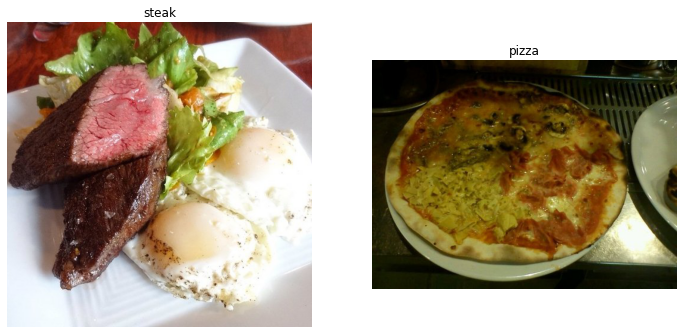

In [32]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [33]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224,224), 
                                              class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224,224), class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [37]:
tf.random.set_seed(42)

model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') ])


model_4.compile(loss=BinaryCrossentropy(), metrics='accuracy', optimizer='adam')

In [38]:
model_4.history = model_4.fit(train_data, validation_data=test_data, epochs=5, steps_per_epoch=len(train_data),
                              validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 44s 933ms/step - loss: 0.9852 - accuracy: 0.5987 - val_loss: 0.4551 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 44s 929ms/step - loss: 0.4479 - accuracy: 0.8007 - val_loss: 0.3597 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 44s 930ms/step - loss: 0.3650 - accuracy: 0.8540 - val_loss: 0.3569 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 44s 930ms/step - loss: 0.2865 - accuracy: 0.8960 - val_loss: 0.3447 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 43s 924ms/step - loss: 0.1680 - accuracy: 0.9447 - val_loss: 0.3727 - val_accuracy: 0.8360


<AxesSubplot:>

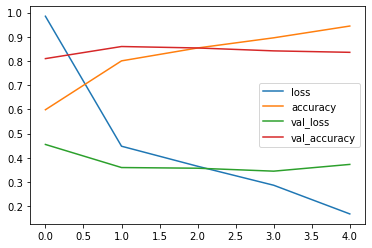

In [39]:
pd.DataFrame(model_4.history.history).plot()

In [40]:
def plot_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label='training accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

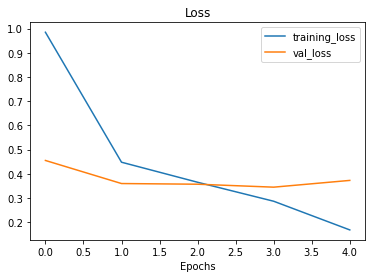

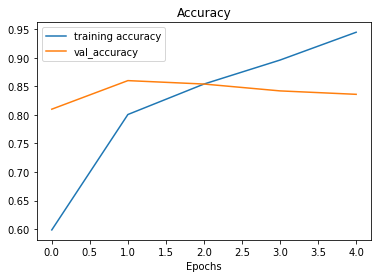

In [41]:
plot_curve(model_4.history)

In [42]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [43]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model_5.compile(loss=BinaryCrossentropy(), metrics='accuracy', optimizer='adam')

In [44]:
model_5.history = model_5.fit(train_data, validation_data=test_data, epochs=5, steps_per_epoch=len(train_data),
                             validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 395ms/step - loss: 0.5911 - accuracy: 0.6920 - val_loss: 0.4467 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 18s 388ms/step - loss: 0.4510 - accuracy: 0.7960 - val_loss: 0.3500 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 18s 391ms/step - loss: 0.4059 - accuracy: 0.8180 - val_loss: 0.3274 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 18s 388ms/step - loss: 0.3917 - accuracy: 0.8313 - val_loss: 0.3338 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 20s 423ms/step - loss: 0.3629 - accuracy: 0.8420 - val_loss: 0.3049 - val_accuracy: 0.8760


In [45]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

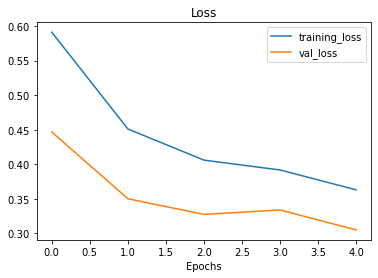

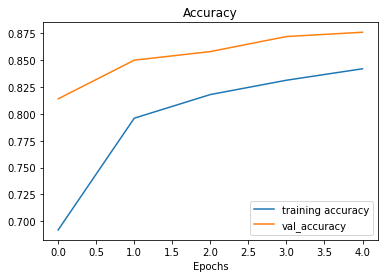

In [46]:
plot_curve(model_5.history)

In [47]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             shear_range=0.2, 
                                             zoom_range=0.2,
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2, 
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [48]:
print("Agumented Train Images")

train_data_agumented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False)

print("Non agumented Train Images")

train_data = train_datagen.flow_from_directory(train_dir, 
                                              target_size=(224,224),
                                              batch_size=32,class_mode='binary', shuffle=False)

print("Test Data")
test_data = test_datagen.flow_from_directory(test_dir, batch_size=32, class_mode='binary',
                                            target_size=(224, 224), shuffle=False)

Agumented Train Images
Found 1500 images belonging to 2 classes.
Non agumented Train Images
Found 1500 images belonging to 2 classes.
Test Data
Found 500 images belonging to 2 classes.


In [49]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_agumented.next() 

In [50]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

IndexError: index 32 is out of bounds for axis 0 with size 32

In [51]:
tf.random.set_seed(42)

model_6 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss = BinaryCrossentropy(), metrics = 'accuracy', optimizer='adam')

In [52]:
model_6.history = model_6.fit(train_data_agumented, validation_data=test_data, epochs=5, 
                              steps_per_epoch=len(train_data_agumented), validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 554ms/step - loss: 0.7498 - accuracy: 0.4293 - val_loss: 0.6929 - val_accuracy: 0.4760
Epoch 2/5
47/47 [==============================] - 31s 657ms/step - loss: 0.6933 - accuracy: 0.4887 - val_loss: 0.6917 - val_accuracy: 0.5480
Epoch 3/5
47/47 [==============================] - 44s 939ms/step - loss: 0.6920 - accuracy: 0.5073 - val_loss: 0.6737 - val_accuracy: 0.5560
Epoch 4/5
47/47 [==============================] - 40s 845ms/step - loss: 0.6762 - accuracy: 0.5560 - val_loss: 0.6087 - val_accuracy: 0.6900
Epoch 5/5
47/47 [==============================] - 30s 636ms/step - loss: 0.6664 - accuracy: 0.6207 - val_loss: 0.6473 - val_accuracy: 0.7080


In [53]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 flatten_5 (Flatten)         (None, 27040)            

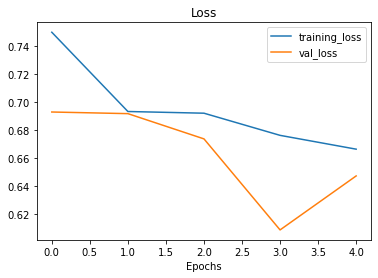

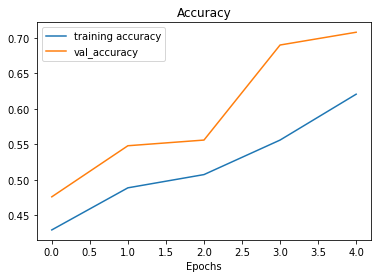

In [54]:
plot_curve(model_6.history)

In [55]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) 

Found 1500 images belonging to 2 classes.


In [56]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [57]:
model_7_history = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 633ms/step - loss: 0.6761 - accuracy: 0.5793 - val_loss: 0.6028 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 29s 618ms/step - loss: 0.5717 - accuracy: 0.7060 - val_loss: 0.4919 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 29s 620ms/step - loss: 0.5297 - accuracy: 0.7467 - val_loss: 0.4893 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 29s 622ms/step - loss: 0.5049 - accuracy: 0.7620 - val_loss: 0.4090 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 29s 623ms/step - loss: 0.5142 - accuracy: 0.7633 - val_loss: 0.5597 - val_accuracy: 0.7320


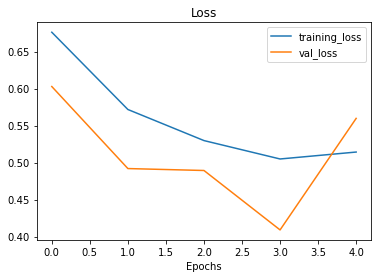

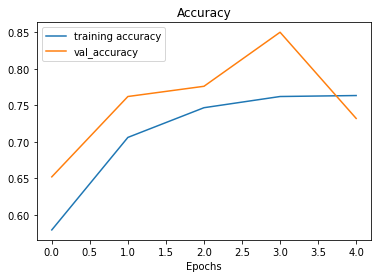

In [58]:
plot_curve(model_7_history)